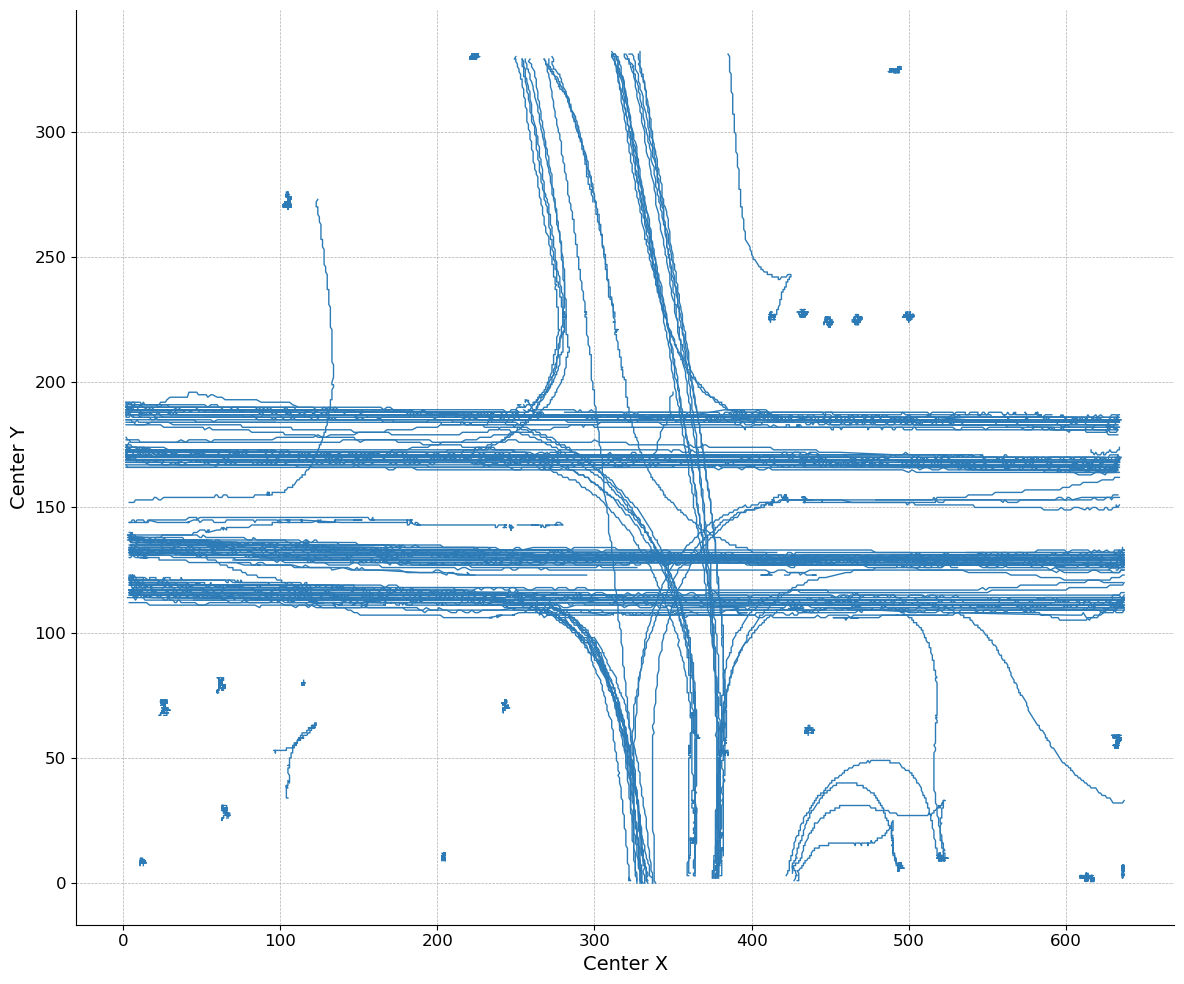

In [10]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Load data
path = Path('csv_out')
df = pd.read_csv(path / 'tracking_data.csv')

# Sort the DataFrame by vehicle ID and frame
df.sort_values(by=['id', 'frame'], inplace=True)

# Invert the y-coordinates
df['center_y'] = df['center_y'].max() - df['center_y']

# Get all vehicle IDs
vehicle_ids = df['id'].unique()

# Create the plot for no turning feature encoding
plt.figure(figsize=(12, 10))

# Iterate over each vehicle ID and plot all in the same color
for vehicle_id in vehicle_ids:
    vehicle_df = df[df['id'] == vehicle_id]
    plt.plot(vehicle_df['center_x'], vehicle_df['center_y'], color='#2C7BB6', linewidth=1)  # All in one color

# Add labels and title
plt.xlabel('Center X', fontsize=14)
plt.ylabel('Center Y', fontsize=14)
# plt.title('Vehicle Trajectories Without Feature Encoding', fontsize=16)

# Adjust plot aesthetics
plt.rcParams.update({'font.size': 12})
plt.grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('vehicle_trajectories_no_feature_encoding.png', dpi=300)
plt.show()


/tmp/ipykernel_40775/2704063477.py:16: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['overall_turn_label'] = df.groupby('id')['overall_turn_label'].fillna(method='ffill')
/tmp/ipykernel_40775/2704063477.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['overall_turn_label'] = df.groupby('id')['overall_turn_label'].fillna(method='ffill')
/tmp/ipykernel_40775/2704063477.py:17: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['overall_turn_label'] = df.groupby('id')['overall_turn_label'].fillna(method='bfill')
/tmp/ipykernel_40

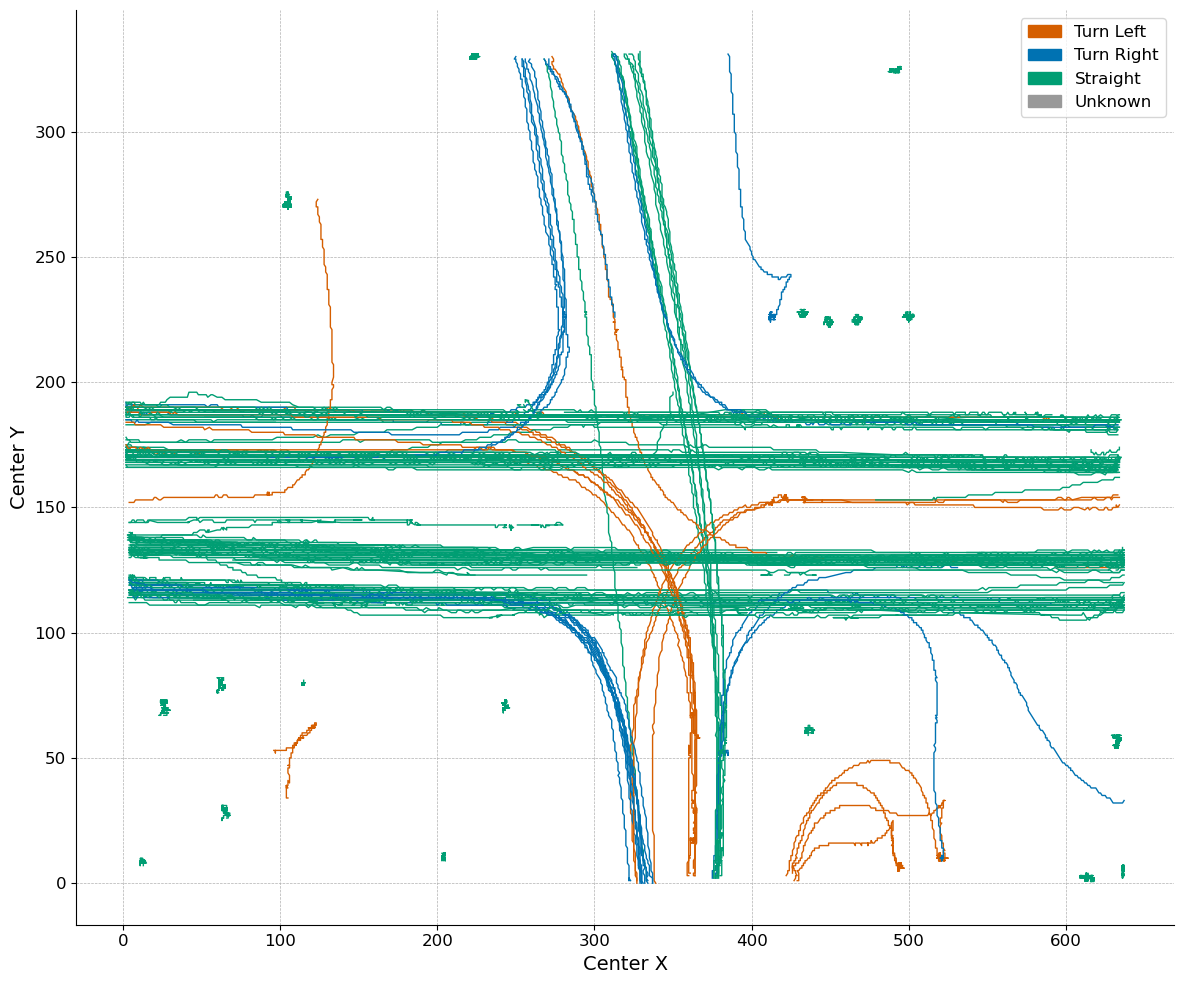

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load data
path = Path('csv_out')
df = pd.read_csv(path / 'tracking_data.csv')
df_turn_label = pd.read_csv(path / 'overall_turn_label.csv')

# Merge the dataframes on 'id' and 'frame'
df = pd.merge(df, df_turn_label[['id', 'frame', 'overall_turn_label']], on=['id', 'frame'], how='left')

# Fill missing 'overall_turn_label' values by forward and backward filling per vehicle id
df['overall_turn_label'] = df.groupby('id')['overall_turn_label'].fillna(method='ffill')
df['overall_turn_label'] = df.groupby('id')['overall_turn_label'].fillna(method='bfill')
df['overall_turn_label'] = df['overall_turn_label'].fillna('Straight')

# Ensure the labels are consistent
label_mapping = {'left_turn': 'Turn Left', 'right_turn': 'Turn Right', 'straight': 'Straight'}
df['overall_turn_label'] = df['overall_turn_label'].map(label_mapping).fillna(df['overall_turn_label'])

# Invert the y-coordinates
df['center_y'] = df['center_y'].max() - df['center_y']

# Define color mapping for overall turn labels
label_color_map = {
    'Turn Left': '#D55E00',  # Orange
    'Turn Right': '#0072B2', # Blue
    'Straight': '#009E73',   # Green
    'Unknown': '#999999'     # Grey (if applicable)
}

# Get all vehicle IDs
vehicle_ids = df['id'].unique()

# Create the figure for turning feature encoding
plt.figure(figsize=(12, 10))

for vehicle_id in vehicle_ids:
    vehicle_df = df[df['id'] == vehicle_id]
    overall_label = vehicle_df['overall_turn_label'].iloc[0]
    color = label_color_map.get(overall_label, 'black')
    plt.plot(vehicle_df['center_x'], vehicle_df['center_y'], color=color, linewidth=1)

# Create legend
handles = [mpatches.Patch(color=color, label=label) for label, color in label_color_map.items()]
plt.legend(handles=handles, fontsize=12)

plt.xlabel('Center X', fontsize=14)
plt.ylabel('Center Y', fontsize=14)
# plt.title('Vehicle Trajectories Colored by Turning Feature Encoding', fontsize=16)

# Adjust plot aesthetics
plt.rcParams.update({'font.size': 12})
plt.grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('vehicle_trajectories_turning_feature_encoding.png', dpi=300)
plt.show()
